KSEI Apps Google Play store 

In [1]:
pip install google-play-scraper

     |████████████████████████████████| 52 kB 1.1 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.3-py3-none-any.whl size=24394 sha256=790b3119c743fef9a4375ec338a2b26eb965830b6f89a53dbd5b1d5789d34abc
  Stored in directory: /Users/iketutg/Library/Caches/pip/wheels/b0/17/bf/a06f635b5343780c7ec2b554dccc3aa4cf3ead928304088ad5
Successfully built google-play-scraper
You should consider upgrading via the '/Users/iketutg/MyKetut/workspace_python/__H8-PYTN071/env_pytn071/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np

Scrape berdasarkan negara 

In [25]:
result = reviews_all(
    'com.kseimobile',
    sleep_milliseconds=0, # defaults to 0
    lang='id',            # defaults to 'en'
    country='id',         # defaults to 'us'
    sort=Sort.NEWEST,     # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)

In [26]:
result, continuation_token = reviews(
    'com.kseimobile',
    lang='id',                # defaults to 'en'
    country='id',             # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=500,               # defaults to 100
    filter_score_with=None    # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [27]:
kseidata = pd.DataFrame(np.array(result),columns=['review'])

kseidata = kseidata.join(pd.DataFrame(kseidata.pop('review').tolist()))

kseidata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOG7SmVcOJx4WWzYCEK9PhXGqAAz_yj2wTDVWYU...,Nurul Huda,https://play-lh.googleusercontent.com/a-/AOh14...,"Loading data lama, mau liat portofolio kadang ...",2,7,1.2.67,2022-02-01 01:17:39,None,NaT
1,gp:AOqpTOFarL-mZSatJXPMQV0BlsnClhmYvt97_cfU43M...,Fitrahadi Bulana,https://play-lh.googleusercontent.com/a/AATXAJ...,Aplikasinya sudh cukup bagus membantu investor...,4,9,1.2.67,2022-01-14 17:16:40,None,NaT
2,gp:AOqpTOE8FLByLDhfdDz7_lKjuXVuXDj-YTePshr4e6A...,IBRAHIM HAMID,https://play-lh.googleusercontent.com/a-/AOh14...,Menu Laporan->Laporan Mutasi Reksa Dana->tangg...,1,0,1.2.67,2022-02-22 19:22:41,"Agar dapat dilakukan pemeriksaan lebih lanjut,...",2022-02-22 20:43:11
3,gp:AOqpTOGfRWZdQxbkpQES9yvBt0ysDLAE9lcC6BrDww-...,muhammad najib,https://play-lh.googleusercontent.com/a-/AOh14...,gak bisa login pake hape samsung J7 pro. tlg S...,1,0,1.2.67,2022-02-16 10:26:24,Mohon maaf atas kendala yang Anda alami.\nSila...,2022-02-16 11:20:24
4,gp:AOqpTOHJrLcy3IhtRG-cueKKHE0k47PlJIRhe3GKJbF...,Bodro Rahwono,https://play-lh.googleusercontent.com/a-/AOh14...,"Sering eror, kadang kerkap kadang nggak",1,0,1.2.67,2022-02-26 21:13:55,None,NaT


In [28]:
len(kseidata.index)

500

In [29]:
kseidata[['content','score','at']].head() 

,content,score,at
0,"Loading data lama, mau liat portofolio kadang ...",2,2022-02-01 01:17:39
1,Aplikasinya sudh cukup bagus membantu investor...,4,2022-01-14 17:16:40
2,Menu Laporan->Laporan Mutasi Reksa Dana->tangg...,1,2022-02-22 19:22:41
3,gak bisa login pake hape samsung J7 pro. tlg S...,1,2022-02-16 10:26:24
4,"Sering eror, kadang kerkap kadang nggak",1,2022-02-26 21:13:55


In [30]:
newkseidata = kseidata[['content','score','at']]
ksiedata_sort = newkseidata.sort_values(by='at', ascending=False) #Sort by Newest, change to True if you want to sort by Oldest.
ksiedata_sort.head()

,content,score,at
15,"Rempong bnget,jd pusing pala",3,2022-02-28 17:57:38
4,"Sering eror, kadang kerkap kadang nggak",1,2022-02-26 21:13:55
403,Mantap dah,5,2022-02-26 18:58:12
67,data yg ditampilkan berbeda dengan yg ada di s...,1,2022-02-22 19:48:46
2,Menu Laporan->Laporan Mutasi Reksa Dana->tangg...,1,2022-02-22 19:22:41


In [31]:
ksiedata_sort.to_excel("ksei_gps_scrapping.xlsx", index = False)  

In [33]:
ksiedata_sort.to_csv("ksei_gps_scrapping.csv", index = False)  

In [14]:
import pandas as pd 

In [34]:
df = pd.read_csv("ksei_gps_scrapping.csv") ##ini direktory saat ini

In [35]:
df.head()

,content,score,at
0,"Rempong bnget,jd pusing pala",3,2022-02-28 17:57:38
1,"Sering eror, kadang kerkap kadang nggak",1,2022-02-26 21:13:55
2,Mantap dah,5,2022-02-26 18:58:12
3,data yg ditampilkan berbeda dengan yg ada di s...,1,2022-02-22 19:48:46
4,Menu Laporan->Laporan Mutasi Reksa Dana->tangg...,1,2022-02-22 19:22:41


In [36]:
dfnodate = df.drop('at',axis=1)
dfnodate.head()

,content,score
0,"Rempong bnget,jd pusing pala",3
1,"Sering eror, kadang kerkap kadang nggak",1
2,Mantap dah,5
3,data yg ditampilkan berbeda dengan yg ada di s...,1
4,Menu Laporan->Laporan Mutasi Reksa Dana->tangg...,1


In [18]:
pip install vaderSentiment

You should consider upgrading via the '/Users/iketutg/MyKetut/workspace_python/__H8-PYTN071/env_pytn071/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [16]:
analyzer = SentimentIntensityAnalyzer();

In [18]:

vs = analyzer.polarity_scores('Sering eror, kadang kerkap kadang nggak')
print(vs)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [7]:
pip install wordcloud

     |████████████████████████████████| 220 kB 2.1 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_11_0_x86_64.whl size=160417 sha256=84eacd98411821cc0c01088e556cd4487d2a3c6a7cb5a55ca5c9ffc94dab4aea
  Stored in directory: /Users/iketutg/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
You should consider upgrading via the '/Users/iketutg/MyKetut/workspace_python/__H8-PYTN071/env_pytn071/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
##pip install sastrawi -q


SyntaxError: invalid syntax (3864909942.py, line 2)

In [37]:
from wordcloud import WordCloud


In [38]:
content = df.drop('score',axis=1)

In [39]:
import matplotlib.pyplot as plt

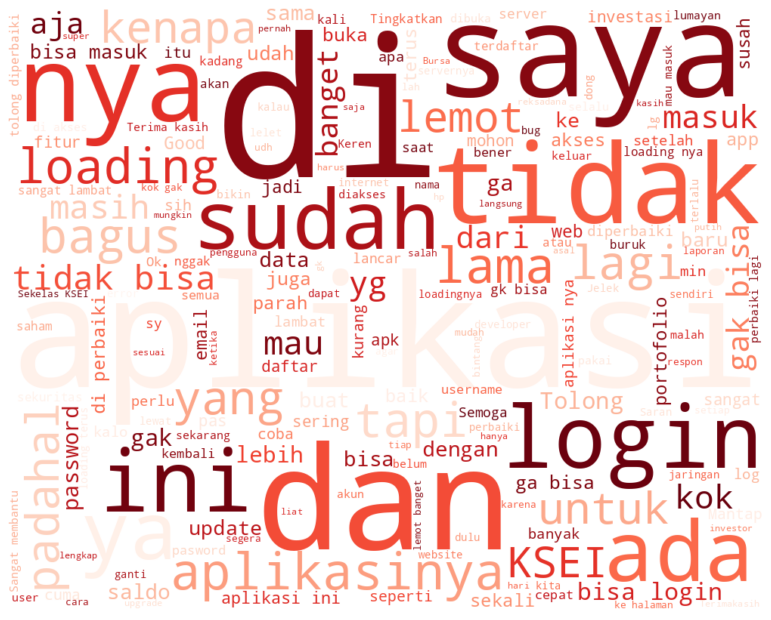

In [40]:

all_text = ' '.join(word for word in content['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()